<a href="https://colab.research.google.com/github/MontanchezJuan/ITENUA_MZL_PROJECT_2024/blob/main/US_ELM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Precisión del K-means: 0.9437
Recall del K-means: 0.9120
F1-Score del K-means: 0.9240


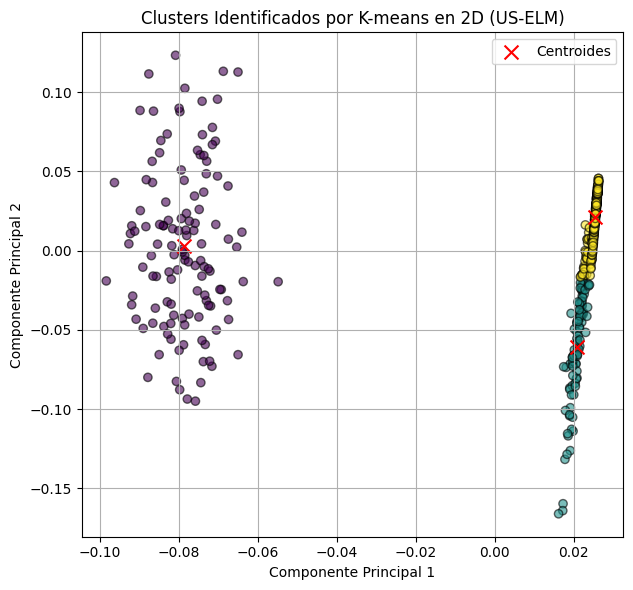

In [1]:
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,recall_score,f1_score
from scipy.cluster.vq import kmeans2
from scipy import linalg

# Configuración de la semilla para reproducibilidad
np.random.seed(42)

# Número de muestras y dimensión de los datos
num_samples = 500
dimension = 1000

# Generación de datos para tres clusters en un espacio de 50 dimensiones
# Cluster 1
center_1 = np.ones(dimension) * 10
cluster_1 = np.random.randn(int(num_samples / 4), dimension) + center_1
labels_1 = np.zeros(int(num_samples / 4))  # Etiquetas del cluster 1

# Cluster 2
center_2 = np.ones(dimension) * 30
cluster_2 = np.random.randn(int(num_samples / 4), dimension) + center_2
labels_2 = np.ones(int(num_samples / 4))  # Etiquetas del cluster 2

# Cluster 3
center_3 = np.ones(dimension) * 50
cluster_3 = np.random.randn(int(num_samples / 2), dimension) + center_3
labels_3 = np.full(int(num_samples / 2), 2)  # Etiquetas del cluster 3

# Concatenar todos los puntos y etiquetas para formar el dataset
data1 = np.vstack((cluster_1, cluster_2, cluster_3))
target = np.concatenate((labels_1, labels_2, labels_3))

# Normalización con MinMaxScaler de sklearn
scaler = MinMaxScaler()
data = scaler.fit_transform(data1)
# --- Implementación del Algoritmo US-ELM ---
no_hidden_neurons = 37
sigma = 0.5
alfa = 0.01
no_clusters = 3  # Número de clusters para K-means


#-------escribir pseudocodigo aqui para guia---------------------------------

# 1. Cálculo de la matriz de similitud
dist_array = np.sum((data[:, np.newaxis] - data[np.newaxis, :]) ** 2, axis=2)
similarity_mat = np.exp(-dist_array / (2 * sigma**2))

# 2. Cálculo de la matriz Laplaciana
laplacian_mat = np.diag(similarity_mat.sum(axis=1)) - similarity_mat

# 3. Pesos de entrada aleatorios y sesgo
input_dim = data.shape[1]
input_weights = np.random.normal(size=(input_dim, no_hidden_neurons))
bias = np.ones((data.shape[0], no_hidden_neurons))

# 4. Matriz oculta
regression_matrix = np.dot(data, input_weights) + bias
hidden_matrix_1 = 1 / (1 + np.exp(-regression_matrix))  # Activación sigmoide

# 5. Cálculo de la matriz intermedia
intermediate = np.dot(hidden_matrix_1.T, np.dot(laplacian_mat, hidden_matrix_1))

# 6. Cálculo de los eigenvectores
A = np.eye(no_hidden_neurons) + alfa * intermediate
B = np.dot(hidden_matrix_1.T, hidden_matrix_1)
eig_value, eig_vector = linalg.eig(A, B)

# 7. Ordenar eigenvectores y valores propios de menor a mayor
idx = eig_value.argsort()
eig_value = eig_value[idx]
eig_vector = eig_vector[:, idx]

# Selección de los eigenvectores requeridos (correspondiente a no_clusters)
req_eigen_vectors1 = eig_vector[:, 1:no_clusters+1]
MatE = np.dot(hidden_matrix_1,req_eigen_vectors1)
req_eigen_vectors = req_eigen_vectors1 / np.linalg.norm(MatE, axis=0)

# 8. Matriz de salida
output_matrix = np.dot(hidden_matrix_1, req_eigen_vectors)

# Normalización de la matriz de salida (si es necesario)
output_matrix = output_matrix / np.linalg.norm(output_matrix, axis=0)

# --- Algoritmo K-means ---
centroid, label = kmeans2(output_matrix, no_clusters, minit='points')

# Calcular las métricas de rendimiento
precision_elm_kmeans = precision_score(target, label, average='macro')
recall_elm_kmeans = recall_score(target, label, average='macro')
f1_score_elm_kmeans = f1_score(target, label, average='macro')

print(f"Precisión del K-means: {precision_elm_kmeans:.4f}")
print(f"Recall del K-means: {recall_elm_kmeans:.4f}")
print(f"F1-Score del K-means: {f1_score_elm_kmeans:.4f}")

# --- Visualización ---

plt.figure(figsize=(12, 6))


# Gráfico de los clusters identificados por K-means después del US-ELM
plt.subplot(1, 2, 2)
plt.scatter(output_matrix[:, 0], output_matrix[:, 1], c=label, cmap='viridis', alpha=0.6, edgecolor='k')
plt.scatter(centroid[:, 0], centroid[:, 1], c='red', marker='x', s=100, label='Centroides')
plt.title('Clusters Identificados por K-means en 2D (US-ELM)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
req_eigen_vectors.shape

(40, 3)

In [ ]:
output_matrix.shape

(500, 3)

In [ ]:
req_eigen_vectors.shape

(40, 3)

In [ ]:
hidden_matrix_1.shape

(500, 40)

In [ ]:
req_eigen_vectors2

array([[ 1.4491107 , -0.04764663,  0.01388225],
       [ 1.2658276 ,  0.0680265 , -0.13389949],
       [ 1.54587177,  0.16852509, -0.02859261],
       ...,
       [-0.46025371,  0.0331321 , -0.04794038],
       [-0.48801834,  0.146485  , -0.03335513],
       [-0.48246691,  0.12165451,  0.10354228]])

In [ ]:
req_eigen_vectors1

array([[ 0.04102487,  0.0086262 ,  0.03024414],
       [-0.0902692 , -0.05177359, -0.01656336],
       [ 0.09188245,  0.02668386, -0.07826812],
       [-0.27978885, -0.17711685, -0.22693111],
       [-0.24594148, -0.09437693, -0.01818148],
       [-0.0343957 , -0.01437024, -0.00657575],
       [ 0.02063775,  0.01865214,  0.01115179],
       [-0.0034669 ,  0.0067379 , -0.00924122],
       [ 0.11657342,  0.02552998, -0.03639911],
       [-0.02808027,  0.20288883, -0.42687793],
       [-0.00224789, -0.02661702,  0.61018601],
       [-0.20832172, -0.11025372,  0.20239558],
       [-0.03475319, -0.01757708, -0.03637891],
       [ 0.08533924,  0.00408432, -0.05300678],
       [ 0.06759371,  0.01422587, -0.08159236],
       [-0.13855024, -0.14658599, -0.27691023],
       [-0.21006568, -0.10227762, -0.16440551],
       [-0.17477148, -0.10136725,  0.07927016],
       [-0.01496227,  0.0124663 , -0.00805325],
       [ 0.01375027,  0.0221812 , -0.01817988],
       [ 0.07051247, -0.01168355,  0.124